# House Price Prediction

## Import Necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

## Data Preprocessing

In [4]:
dataframe = pd.read_csv('../data/USA_Housing.csv')
dataframe.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [5]:
dataframe.shape

(5000, 7)

In [6]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [9]:
dataframe['Address'].value_counts()

Address
208 Michael Ferry Apt. 674\nLaurabury, NE 37010-5101             1
314 Christopher Square Apt. 404\nLake Ronaldville, SD 42025      1
21042 Wilson Islands Suite 238\nFischerchester, MP 42425-4129    1
Unit 8831 Box 5748\nDPO AE 73012-7314                            1
481 Kaitlin Mission Apt. 309\nJodystad, IA 16947                 1
                                                                ..
054 Carter Crescent Suite 674\nGlennport, WA 11140               1
8460 Kathleen Mission Apt. 482\nPort Amytown, KY 72016           1
3737 Hartman Rue\nReneestad, ID 69250-7718                       1
3465 Latoya Well\nNelsonmouth, MI 55741-4287                     1
37778 George Ridges Apt. 509\nEast Holly, NV 29290-3595          1
Name: count, Length: 5000, dtype: int64

In [10]:
new_dataframe = dataframe.drop(columns=['Address'])
new_dataframe

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05
...,...,...,...,...,...,...
4995,60567.944140,7.830362,6.137356,3.46,22837.361035,1.060194e+06
4996,78491.275435,6.999135,6.576763,4.02,25616.115489,1.482618e+06
4997,63390.686886,7.250591,4.805081,2.13,33266.145490,1.030730e+06
4998,68001.331235,5.534388,7.130144,5.44,42625.620156,1.198657e+06


In [19]:
new_dataframe.isna().sum()

Avg. Area Income                0
Avg. Area House Age             0
Avg. Area Number of Rooms       0
Avg. Area Number of Bedrooms    0
Area Population                 0
Price                           0
dtype: int64

In [12]:
new_dataframe.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


## Assigning X and y

In [20]:
X = new_dataframe.drop(columns=['Price'])
X.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
0,79545.458574,5.682861,7.009188,4.09,23086.800503
1,79248.642455,6.002900,6.730821,3.09,40173.072174
2,61287.067179,5.865890,8.512727,5.13,36882.159400
3,63345.240046,7.188236,5.586729,3.26,34310.242831
4,59982.197226,5.040555,7.839388,4.23,26354.109472


In [21]:
y = new_dataframe['Price']
y[:5]

0    1.059034e+06
1    1.505891e+06
2    1.058988e+06
3    1.260617e+06
4    6.309435e+05
Name: Price, dtype: float64

## Splitting Dataset: Training and Test Data

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=40)

## Building Model

In [23]:
model = LinearRegression()

### Model Training

In [24]:
model.fit(X_train,y_train)

LinearRegression()

### Prediction

In [28]:
model_prediction = model.predict(X_test)
model_prediction[:5]

array([1437332.41812784, 1544592.31469036, 1712490.31897132,
       1079392.12335882, 1281689.07000463])

## Model Evaluation

In [30]:
mae = mean_absolute_error(y_test, model_prediction)
mse = mean_squared_error(y_test, model_prediction)
r2 = r2_score(y_test,model_prediction)

In [31]:
print('MAE: ',mae)
print('MSE: ',mse)
print('R2 : ',r2)

MAE:  82095.59519385493
MSE:  10593884648.41018
R2 :  0.9148353285895493


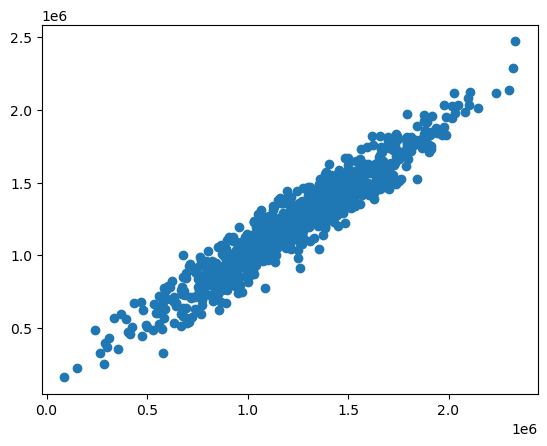

In [35]:
plt.scatter(y_test,model_prediction)
plt.show()